In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import hyperopt
import sys
sys.path.append('../spock/')
try:
    plt.style.use('paper')
except:
    pass
%matplotlib inline

In [2]:
#load datapath for clean training data that is generated
datapath = '../../cleanData/csvs/resonant/'
#thetaSTDtest
#ZcritTest
#tryMean
# dataset = pd.read_csv(datapath+'chiSecTest.csv')
dataset = pd.read_csv(datapath+'3BRmean.csv')

#thetaSTDtest
# comp = pd.read_csv(datapath+'thetaSTDtest.csv')
# #remove junk columns
# comp = comp.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
dataset = dataset.drop(columns=['Unnamed: 0','Unnamed: 0.1','Zcrit12','Zcrit23'])

In [ ]:
1997     False
3077     False
3297     False
6120     False
7800     False
12298    False
13603    False
14954    False
16288    False
22183    False
28199    False
28993    False
41684    False
45359    False
64400    False
72602    False
84229    False

In [3]:
dataset.describe()

,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,EMcrossfar,EMfracstdfar,EPstdfar,MMRstrengthfar,MEGNO,MEGNOstd,ThetaSTD12,ThetaSTD23,chiSec,Zval12,Zval23,threeBRfillfac,threeBRfillstd,Tsec,instability_time,shadow_instability_time
count,102497.000000,95951.000000,95951.000000,94869.000000,102497.000000,95951.000000,95951.000000,77280.000000,95951.000000,95951.000000,102497.000000,102497.000000,102497.000000,102497.000000,102497.000000,9.595100e+04,9.595100e+04,102497.000000,1.024970e+05,1.024970e+05
mean,0.144542,0.076233,0.004712,0.655046,0.358875,0.036325,0.004954,0.254703,27.440639,6.799070,1.381586,1.405813,0.501388,0.042687,0.038908,1.328355e+04,3.336121e+03,19735.671028,2.602292e+08,2.679298e+08
std,0.103741,0.100981,0.009005,1.718589,0.200712,0.040325,0.007801,1.136777,76.894531,20.049145,0.639138,0.623778,0.384322,0.048974,0.040734,4.103294e+06,1.030504e+06,22710.199258,4.221284e+08,4.285158e+08
min,0.012845,0.000699,0.000002,0.000271,0.020136,0.000105,0.000001,0.000089,-314.447595,0.000001,0.004862,0.003875,0.000033,0.000034,0.000012,1.057931e-06,5.609812e-03,608.077377,1.000287e+04,0.000000e+00
25%,0.072808,0.024217,0.000362,0.059480,0.199495,0.009326,0.000596,0.012955,1.998407,0.009298,0.887140,0.994170,0.087216,0.011882,0.011487,9.107436e-04,1.856469e-01,5307.092967,8.373884e+04,7.563998e+04
50%,0.117834,0.044672,0.001316,0.155439,0.315298,0.022729,0.001983,0.033349,2.377402,0.199454,1.734179,1.741666,0.503940,0.026587,0.025445,5.556562e-03,4.951974e-01,11471.545001,1.390492e+06,1.410175e+06
75%,0.182629,0.087327,0.004940,0.564222,0.484311,0.048545,0.005883,0.105331,16.864892,4.072375,1.826833,1.827286,0.914295,0.054871,0.051704,3.173932e-02,1.279341e+00,25319.996675,4.969742e+08,7.897363e+08
max,0.982453,7.790969,0.188421,63.156961,1.194679,0.600259,0.188758,57.242267,2397.757540,668.779808,2.939046,2.987028,0.999978,0.593743,0.462893,1.271032e+09,3.192080e+08,241280.408566,1.000000e+09,1.000000e+09


In [4]:
plot = dataset

In [5]:
plot['ThetaSTD23']

0         0.175815
1         0.506031
2         1.817754
3         1.731534
4         1.786382
            ...   
102492    1.907635
102493    0.142057
102494    1.891006
102495    1.792100
102496    1.296241
Name: ThetaSTD23, Length: 102497, dtype: float64

In [6]:
plot['ThetaSTD']= plot[['ThetaSTD12','ThetaSTD23']].max(axis=1)

In [7]:
plot['threeBRfillfac'].isna().sum()

6546

In [8]:
plot = plot.drop(plot[plot['threeBRfillfac'] == np.nan].index)


In [9]:
plot

,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,EMcrossfar,EMfracstdfar,EPstdfar,MMRstrengthfar,MEGNO,MEGNOstd,...,Zval23,threeBRfillfac,threeBRfillstd,Tsec,InitialStable,runstring,instability_time,shadow_instability_time,Stable,ThetaSTD
0,0.060234,0.029458,0.001995,0.493311,0.504063,0.002902,0.000816,NaN,1.998619,0.003190,...,0.021910,0.061257,2.089781,28431.468891,True,0000000.bin,1.545872e+06,3.063700e+06,False,1.815024
1,0.080547,0.016559,0.000112,0.452015,0.240504,0.006736,0.001621,0.008674,2.001688,0.004966,...,0.059626,0.032420,1.075407,3904.312508,True,0000001.bin,9.990000e+08,9.990000e+08,True,1.772353
2,0.129660,0.028840,0.003182,1.000007,1.001981,0.001402,0.003742,0.010417,1.995051,0.003312,...,0.039169,0.002872,0.546979,70073.708587,True,0000002.bin,9.990000e+08,9.990000e+08,True,1.817754
3,0.406112,0.036450,0.002390,0.316676,0.427768,0.036189,0.008580,0.012898,2.002498,0.000335,...,0.043470,0.000076,0.135616,18314.546267,True,0000003.bin,2.287671e+06,8.392234e+06,False,1.731534
4,0.059897,0.028003,0.001623,0.334384,0.257596,0.053194,0.001287,0.034789,2.029737,0.013224,...,0.041247,0.023065,2.468805,4110.218384,True,0000004.bin,9.668931e+05,3.380350e+05,False,1.786382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,0.089252,NaN,NaN,NaN,0.310694,NaN,NaN,NaN,NaN,NaN,...,0.037360,NaN,NaN,23579.726004,False,9044761.bin,6.303165e+04,6.470086e+04,False,1.907635
102493,0.082222,0.039520,0.006137,0.680177,0.664222,0.030981,0.001015,NaN,1.999417,0.004993,...,0.021827,0.049348,3.824021,4127.660202,True,9045377.bin,6.990387e+05,8.267916e+05,False,1.745603
102494,0.131799,0.022001,0.000148,0.875319,0.366664,0.060675,0.016560,0.005155,2.079854,0.076477,...,0.059258,0.002791,0.563830,1130.408347,True,9045380.bin,1.193822e+07,3.363291e+07,False,1.891006
102495,0.209454,0.036894,0.005252,1.492760,0.395073,0.102268,0.022792,0.029797,1.875272,0.066749,...,0.039101,0.000576,0.122763,4234.380683,True,9045382.bin,2.064407e+08,4.316851e+07,False,1.792100


In [10]:
def plotfill(x):
    #can roughly add 6 for the ignored term
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = np.sqrt(-np.log(1-(x**(-1))))
    return p1+p2+6
fillList = np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: (x), y))

In [16]:
(plot['instability_time']>1e8).sum()

30325

In [17]:
test = plot.drop(plot[plot['threeBRfillfac'] <3].index)

In [18]:
(test['instability_time']>1e8).sum()

24

/tmp/ipykernel_93497/2207674605.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=(np.log10(plot['ThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=1.5,alpha=.8)


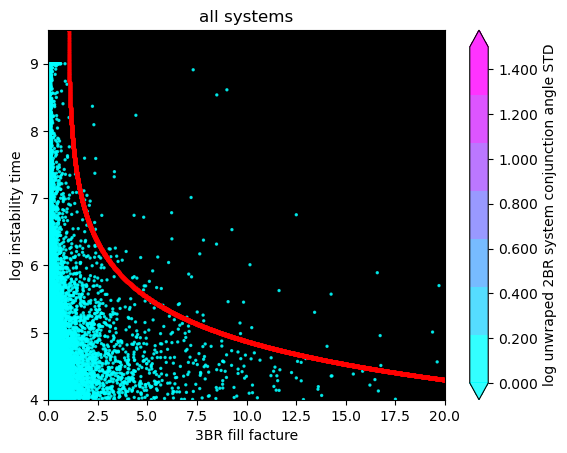

In [13]:
ax = plt.axes()
plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=(np.log10(plot['ThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=1.5,alpha=.8)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=2, c = 'red')
ax.set_xlim([0,20])
ax.set_ylim([4,9.5])
plt.xlabel("3BR fill facture")
plt.ylabel("log instability time")
plt.title("all systems")
cbar.set_label('log unwraped 2BR system conjunction angle STD')
ax.set_facecolor("black")